In [1]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Descriptors, AllChem

In [3]:
def create_reaction(reactant, product):
    mols = [Chem.MolFromSmiles(sm) for sm in (reactant, product)]
    mcs = rdFMCS.FindMCS(mols).queryMol
    matches = [mol.GetSubstructMatch(mcs) for mol in mols]
    map_count = 1
    for atoms_idx in zip(*matches):
        for mol, idx in zip(mols, atoms_idx):
            atom = mol.GetAtomWithIdx(idx)
            atom.SetAtomMapNum(map_count)
        map_count +=1
    mols_smarts = [Chem.MolToSmarts(mol) for mol in mols]
    return AllChem.ReactionFromSmarts('>>'.join(mols_smarts))


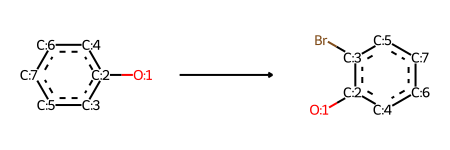

In [3]:
rxn = create_reaction("Oc1ccccc1", "Oc1c(Br)cccc1")
rxn

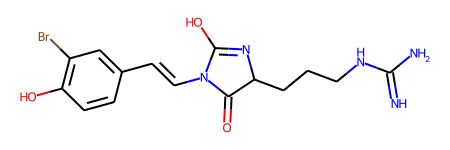

In [18]:
pz = Chem.MolFromSmiles("[H]\C(=C(\[H])C1=CC=C(O)C=C1)N1C(O)=NC(CCCNC(N)=N)C1=O")
pz
res = rxn.RunReactants((pz,))[0][0]
res

In [19]:
Chem.MolToSmiles(res)

'N=C(N)NCCCC1N=C(O)N(/C=C/c2ccc(O)c(Br)c2)C1=O'

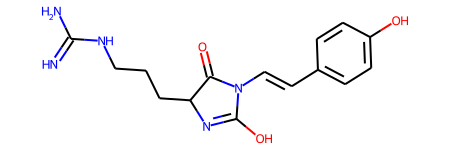

In [7]:
pz

In [27]:
Chem.Kekulize(res, clearAromaticFlags=True)
Chem.MolToSmiles(res, kekuleSmiles=True, isomericSmiles=False)

'N=C(N)NCCCC1N=C(O)N(C=CC2=CC(Br)=C(O)C=C2)C1=O'

In [26]:
"NC(=N)NCCCC1NC(=O)N(C=CC2=CC=C(O)C(Br)=C2)C1=O"

'NC(=N)NCCCC1NC(=O)N(C=CC2=CC=C(O)C(Br)=C2)C1=O'

In [9]:
Chem.MolToSmiles(rxn.RunReactants((pz,))[0][0], kekuleSmiles=True)

'N=C(N)NCCCC1N=C(O)N(/C=C/C2:C:C:C(O):C(Br):C:2)C1=O'

In [10]:
Chem.MolToSmiles(rxn.RunReactants((pz,))[0][0], kekuleSmiles=False)

'N=C(N)NCCCC1N=C(O)N(/C=C/c2ccc(O)c(Br)c2)C1=O'

'NC(=N)NCCCC1NC(=O)N(C=CC2=CC=C(O)C(Br)=C2)C1=O'

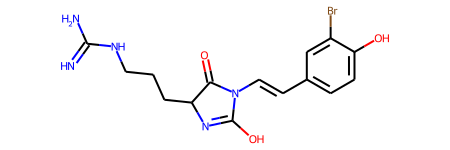

In [8]:
Chem.MolFromSmiles("[H]\C(=C(\[H])c1ccc(O)c(Br)c1)N1C(O)=NC(CCCNC(N)=N)C1=O")

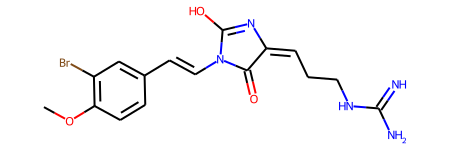

In [97]:
pz = Chem.MolFromSmiles("[H]\C(CCNC(N)=N)=C1/N=C(O)N(\C([H])=C(/[H])C2=CC=C(OC)C=C2)C1=O")
pz
rxn.RunReactants((pz,))[0][0]

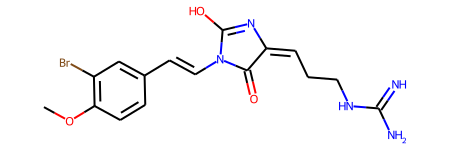

In [98]:
rxn.RunReactants((pz,))[1][0]

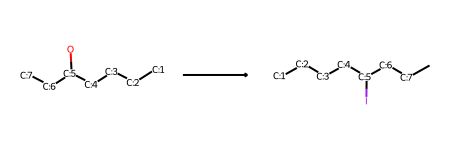

In [24]:
create_reaction("CCCCC(O)CC", "CCCCC(I)CCC")

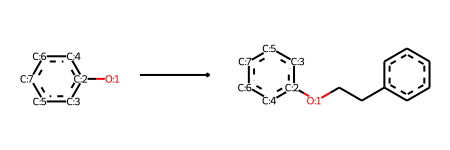

In [25]:
create_reaction("OC1=CC=CC=C1", "C(CC1=CC=CC=C1)OC1=CC=CC=C1")

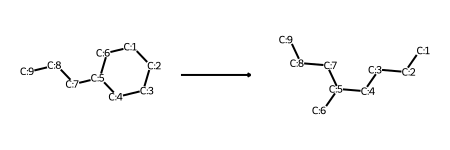

In [5]:
rxn = create_reaction("CCCC1CCCCC1", "CCCCC(C)CCC")
rxn

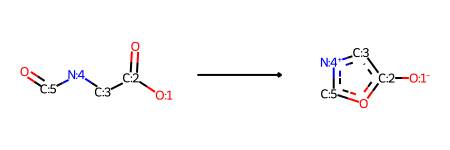

In [6]:
rxn = create_reaction("OC(=O)CNC=O", "[O-]C1=C[NH+]=CO1")
rxn

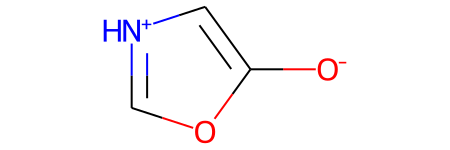

In [7]:
pz = Chem.MolFromSmiles("OC(=O)CNC=O")
pz
rxn.RunReactants((pz,))[0][0]

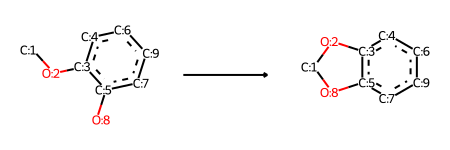

In [8]:
sm_react = "COC1=CC=CC=C1O"
sm_prod = "C1OC2=C(O1)C=CC=C2"
rxn = create_reaction(sm_react, sm_prod)
rxn

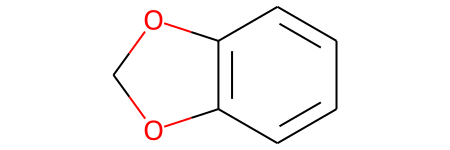

In [9]:
prod = Chem.MolFromSmiles(sm_react)
rxn.RunReactants((prod,))[0][0]

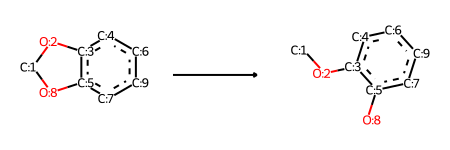

In [10]:
sm_react = "C1OC2=C(O1)C=CC=C2"
sm_prod = "COC1=CC=CC=C1O"
rxn = create_reaction(sm_react, sm_prod)
rxn

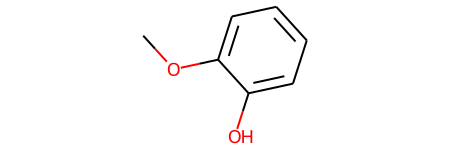

In [11]:
prod = Chem.MolFromSmiles(sm_react)
rxn.RunReactants((prod,))[0][0]